In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load arrays or pickled objects from ``.npy``, ``.npz`` or pickled files.
data = np.load('./datasets/mnist_train_small.npy')

In [3]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
# Each example has 785 features and there are 20k examples
data.shape

(19999, 785)

In [5]:
# first column is the y
# rest 784 columns are X .i.e 784 = 28 * 28
X = data[:,1:]
y = data[:,0]

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
y

array([5, 7, 9, ..., 2, 9, 5], dtype=uint8)

In [8]:
X.shape, y.shape

((19999, 784), (19999,))

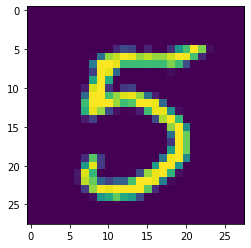

In [9]:
# flatten first image
# Flattening is converting X into comparable model for do unit wise comparison for feature units
plt.imshow(X[0].reshape(28, 28))

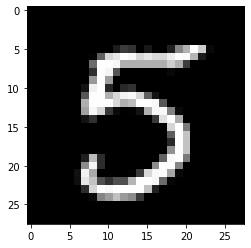

In [10]:
plt.imshow(X[0].reshape(28, 28),cmap='gray')

In [11]:
# Verify
y[0]

5

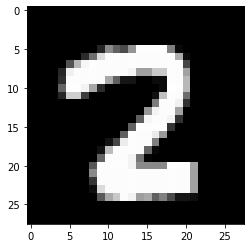

In [12]:
plt.imshow(X[2576].reshape(28,28),cmap='gray')

In [13]:
y[2576]

2

In [14]:
# Split arrays or matrices into random train and test subsets
# 66% train 33% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [15]:
X_train.shape, y_train.shape

((13399, 784), (13399,))

In [16]:
X_test.shape, y_test.shape

((6600, 784), (6600,))

In [17]:
# create object of this class
# default value of K is 5
model = KNeighborsClassifier()

In [18]:
# training the model happens in fir function
# plotting the points on the graph
# no work is happening in training knn model
# as until new test point is not given distance cannot be computed
model.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [20]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

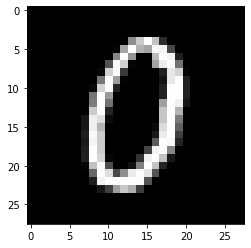

In [21]:
plt.imshow(X_test[2].reshape(28, 28), cmap='gray')

In [22]:
model.score(X_test[:100],y_test[:100])

0.95

## Custom KNN

In [23]:
class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours=n_neighbours
        
    # training function
    def fit(self,X,y):
         # standardisation : between 0 and 1: make data small: ie make mean 0 and std 1
        self._X=(X - X.mean()) / X.std() 
        self._y=y
        
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self,point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            # append dist and class
            list_dist.append([dist_point, y_point])
            
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self,X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure an accuracy
    def score(self,X,y):
        return sum(self.predict(X) == y) / len(y)

In [24]:
m2 = CustomKNN()

In [25]:
m2.fit(X_train, y_train)

In [26]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [27]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [28]:
m2.score(X_test[:100], y_test[:100])

0.95

In [29]:
X_test[1].shape

(784,)

### Demo code

In [30]:
# zip function
X = [1,2,2,3,4,5]
y = [0,1,0,1,1,0]
list(zip(X,y))

[(1, 0), (2, 1), (2, 0), (3, 1), (4, 1), (5, 0)]

In [31]:
# sorting
li = [
    [23,0],
    [45,1],
    [19,0],
    [3,2]
]

In [32]:
sorted(li)

[[3, 2], [19, 0], [23, 0], [45, 1]]

In [33]:
sorted(li, key=lambda x:x[1])

[[23, 0], [19, 0], [45, 1], [3, 2]]

In [45]:
# finding maximum clusters
li = [
    [22,5],
    [54,4],
    [10,3],
    [8,5],
    [32,5],
    [5,4]
]

In [46]:
sorted_li = sorted(li)

In [47]:
top_k = sorted_li[:5]

In [48]:
top_k

[[5, 4], [8, 5], [10, 3], [22, 5], [32, 5]]

In [49]:
# three unique classes 0,1,2
np.unique(np.array(top_k)[:,1])

array([3, 4, 5])

In [50]:
item, counts = np.unique(np.array(top_k)[:,1],return_counts=True)

In [51]:
item

array([3, 4, 5])

In [52]:
counts

array([1, 1, 3], dtype=int64)

In [53]:
np.argmax(counts)

2

In [43]:
# score
np.array([1,2,3,1,1]) == np.array([0,2,3,4,1])

array([False,  True,  True, False,  True])

In [44]:
sum(np.array([1,2,3,1,1]) == np.array([0,2,3,4,1]))

3